In [2]:
%pip install highlight-text
import matplotlib.pyplot as plt
import pandas as pd
from highlight_text import fig_text

#Load the data

df=pd.read_html('https://fbref.com/en/matches/68c2e6b8/Brentford-Manchester-City-January-14-2025-Premier-League', attrs={'id': 'shots_all'})[0]

Note: you may need to restart the kernel to use updated packages.


In [3]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                  6        Yoane Wissa          Brentford               0.04   
1                  8     Joško Gvardiol    Manchester City               0.10   
2                 15       Bryan Mbeumo          Brentford               0.04   
3                 20        Yoane Wissa          Brentford               0.06   
4                 23     Erling Haaland    Manchester City               0.18   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0               0.00         Off Target               17.0         Right Foot   
1               0.23              Saved               22.0         Right Foot   
2               0.28              Saved               16.0          Left Foot   
3               0.00         Off Target               14.0         Right Foot   
4               0.00         Off Target                5.0               Head   

  Unnamed: 8_level_0             SCA 1                            SCA 2  \
               Notes            Player        Event              Player   
0                NaN    Mathias Jensen  Pass (Live)  Christian Nørgaard   
1                NaN     Mateo Kovačić  Pass (Live)       Matheus Nunes   
2          Deflected  Mikkel Damsgaard  Pass (Live)  Christian Nørgaard   
3                NaN  Mikkel Damsgaard  Pass (Live)       Mads Roerslev   
4                NaN   Kevin De Bruyne  Pass (Live)          Nathan Aké   

                
         Event  
0  Pass (Live)  
1  Pass (Live)  
2  Pass (Live)  
3  Pass (Live)  
4  Pass (Live)

In [4]:
#Clean the data
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [5]:
# And filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Brentford,Yoane Wissa,6,0.04,Off Target
1,Manchester City,Joško Gvardiol,8,0.10,Saved
2,Brentford,Bryan Mbeumo,15,0.04,Saved
3,Brentford,Yoane Wissa,20,0.06,Off Target
4,Manchester City,Erling Haaland,23,0.18,Off Target


In [6]:
# Now let's create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG
0,Brentford,Yoane Wissa,6,0.04,Off Target,0.04
1,Manchester City,Joško Gvardiol,8,0.10,Saved,0.10
2,Brentford,Bryan Mbeumo,15,0.04,Saved,0.08
3,Brentford,Yoane Wissa,20,0.06,Off Target,0.14
4,Manchester City,Erling Haaland,23,0.18,Off Target,0.28
5,Brentford,Mikkel Damsgaard,26,0.10,Blocked,0.24
6,Manchester City,Sávio,28,0.08,Off Target,0.36
7,Manchester City,Phil Foden,30,0.05,Blocked,0.41
8,Manchester City,Mateo Kovačić,34,0.05,Off Target,0.46
9,Manchester City,Mateo Kovačić,36,0.03,Blocked,0.49


In [7]:
# We also need to get the minute in a format that we can use to plot the flow chart
# Let's first drop the nan values that FBREF uses as a divider
# So let's drop that nan row and then cast to an int
df = df.dropna(subset=['Minute'])
df['Minute']

0        6
1        8
2       15
3       20
4       23
5       26
6       28
7       30
8       34
9       36
10      38
11      45
13      47
14      50
15      50
16      51
17      52
18      54
19      58
20      61
21      61
22      62
23      62
24      64
25      65
26      66
27      70
28      71
29      78
30      78
31      82
32      82
33      83
34      85
35      90
36      90
37    90+2
38    90+4
39    90+5
Name: Minute, dtype: object

In [8]:
# You might also see that some minutes have a '+' in them, which means that the minute is the minute of the first half plus the minute of the second half
# Let's also create a column that shows which half the minute is 
# (since we can have a 46th minute in the first half and a 46th minute in the second half)
df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)
df

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_76747/3340019740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


,Squad,Player,Minute,xG,Outcome,cumulative_xG,half
0,Brentford,Yoane Wissa,6,0.04,Off Target,0.04,1
1,Manchester City,Joško Gvardiol,8,0.10,Saved,0.10,1
2,Brentford,Bryan Mbeumo,15,0.04,Saved,0.08,1
3,Brentford,Yoane Wissa,20,0.06,Off Target,0.14,1
4,Manchester City,Erling Haaland,23,0.18,Off Target,0.28,1
5,Brentford,Mikkel Damsgaard,26,0.10,Blocked,0.24,1
6,Manchester City,Sávio,28,0.08,Off Target,0.36,1
7,Manchester City,Phil Foden,30,0.05,Blocked,0.41,1
8,Manchester City,Mateo Kovačić,34,0.05,Off Target,0.46,1
9,Manchester City,Mateo Kovačić,36,0.03,Blocked,0.49,1


In [9]:
# Now let's adjust the minute to add the minutes if there is a '+' in the minute
df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))
df['Minute']

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_76747/3789240490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


0      6
1      8
2     15
3     20
4     23
5     26
6     28
7     30
8     34
9     36
10    38
11    45
13    47
14    50
15    50
16    51
17    52
18    54
19    58
20    61
21    61
22    62
23    62
24    64
25    65
26    66
27    70
28    71
29    78
30    78
31    82
32    82
33    83
34    85
35    90
36    90
37    92
38    94
39    95
Name: Minute, dtype: int64

Text(0.1, 0.0, '@hazanserifli/Brentford_ManchesterCity_Analysis')

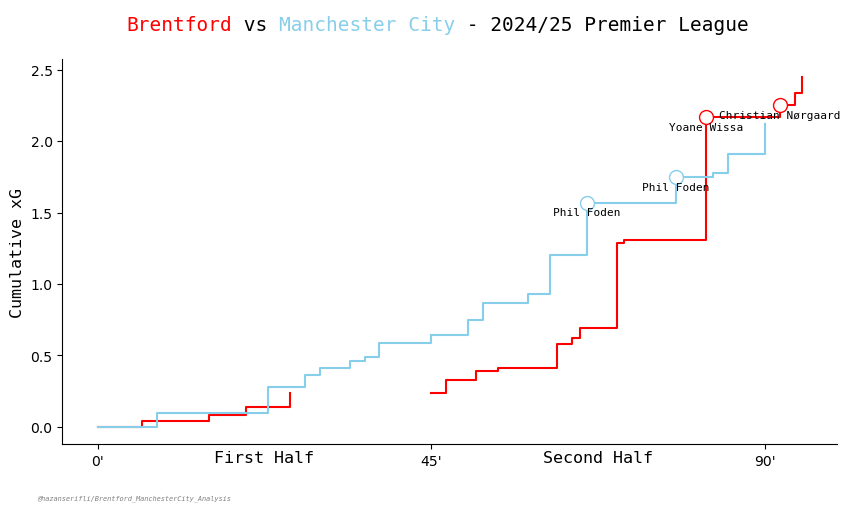

In [10]:


# Assuming `df` is your DataFrame containing the required data
# Update the team colors
brentford_color = 'red'
man_city_color = 'skyblue'

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the xG for each team by half
for team in df['Squad'].unique():
    team_df = df[df['Squad'] == team]
    
    # Add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Add a row at the beginning of the second half
    team_df = pd.concat([team_df[team_df['half'] == 1], 
                         pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Goal', 
                                       'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 
                                       'half': 2}, index=[0]), 
                         team_df[team_df['half'] == 2]])
    
    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=brentford_color if team == 'Brentford' else man_city_color
        )

# Add scatter plot to show goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=brentford_color if team == 'Brentford' else man_city_color,
            s=100,
            zorder=5
        )
        
        # Add label for goals
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] - .07, 
            x['Player'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )

# Label the x-axis
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

# Add "First Half" and "Second Half" labels
ax.text(22.5, -.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)

# Label the y-axis
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Highlight text for the title
fig_text(
    0.5,
    0.95,
    '<Brentford> vs <Manchester City> - 2024/25 Premier League', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': brentford_color}, {'color': man_city_color}]
)

# Add attribution at the bottom-left
fig.text(
    0.1, 
    0.00, 
    '@hazanserifli/Brentford_ManchesterCity_Analysis', 
    fontsize=5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)